<a href="https://colab.research.google.com/github/yandod/colaboratory_notes/blob/main/Covid19Setagaya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ライブラリの読み込み

In [ ]:
!pip install japanize-matplotlib
import pandas as pd
import urllib.request
import json
import pprint
import matplotlib.pyplot as plt
import japanize_matplotlib
import matplotlib.dates as mdates

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


githubからJsonを読み込みとりあえず表示

In [ ]:
json_raw = ''
data = None
with urllib.request.urlopen('https://raw.githubusercontent.com/yandod/covid19-setagaya/main/data/output.json') as url:
  json_raw = url.read().decode()
  data = json.loads(json_raw)
  pprint.pprint(data['data'][:1])

[{'confirmed_cases': '133801',
  'confirmed_cases_age_0_9': '16226',
  'confirmed_cases_age_100_109': '62',
  'confirmed_cases_age_10_19': '14187',
  'confirmed_cases_age_20_29': '29559',
  'confirmed_cases_age_30_39': '22835',
  'confirmed_cases_age_40_49': '20519',
  'confirmed_cases_age_50_59': '12497',
  'confirmed_cases_age_60_69': '5223',
  'confirmed_cases_age_70_79': '3119',
  'confirmed_cases_age_80_89': '2003',
  'confirmed_cases_age_90_99': '901',
  'confirmed_cases_age_unknown': '2',
  'confirmed_cases_female': '62872',
  'confirmed_cases_male': '64261',
  'cured': '117008',
  'date': '2022-07-23',
  'deaths': '212',
  'home_care': '15730',
  'hotel_care': '458',
  'inpatient_care': '393',
  'updated_date': '7月21日現在'}]


pandasでも読み込み

In [ ]:
po = pd.read_json(json.dumps(data['data']))
po

,date,updated_date,confirmed_cases,inpatient_care,hotel_care,home_care,cured,deaths,confirmed_cases_male,confirmed_cases_female,...,confirmed_cases_age_20_29,confirmed_cases_age_30_39,confirmed_cases_age_40_49,confirmed_cases_age_50_59,confirmed_cases_age_60_69,confirmed_cases_age_70_79,confirmed_cases_age_80_89,confirmed_cases_age_90_99,confirmed_cases_age_100_109,confirmed_cases_age_unknown
0,2022-07-23,7月21日現在,133801,393,458,15730,117008,212,64261,62872,...,29559,22835,20519,12497,5223,3119,2003,901,62,2
1,2022-07-22,7月21日現在,133801,393,458,15730,117008,212,64261,62872,...,29559,22835,20519,12497,5223,3119,2003,901,62,2
2,2022-07-21,7月20日現在,130994,361,481,13304,116636,212,64261,62872,...,29559,22835,20519,12497,5223,3119,2003,901,62,2
3,2022-07-20,7月19日現在,128471,334,509,11503,115913,212,64261,62872,...,29559,22835,20519,12497,5223,3119,2003,901,62,2
4,2022-07-19,7月15日現在,123695,295,364,9783,113041,212,59827,58211,...,27663,21341,19064,11467,4779,2841,1849,821,56,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,2022-04-10,NaN,90740,638,132,5452,84318,200,45513,43472,...,21612,16218,14263,8652,3662,2256,1523,671,40,1
100,2022-04-09,NaN,90740,638,132,5452,84318,200,45513,43472,...,21612,16218,14263,8652,3662,2256,1523,671,40,1
101,2022-04-08,NaN,90740,638,132,5452,84318,200,45513,43472,...,21612,16218,14263,8652,3662,2256,1523,671,40,1
102,2022-04-07,NaN,90200,617,144,5138,84101,200,45513,43472,...,21612,16218,14263,8652,3662,2256,1523,671,40,1


グラフにする

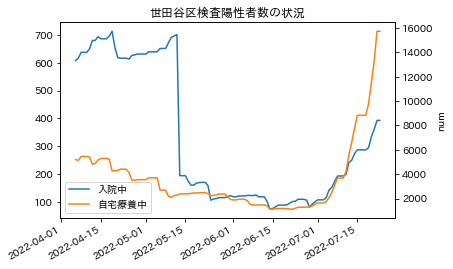

In [ ]:
fig, axes_inpatient = plt.subplots()

axes_inpatient.plot(po.iloc[:,0], po.iloc[:,3] ,'C0', label='入院中')
axes_home = axes_inpatient.twinx()
axes_home.plot(po.iloc[:,0], po.iloc[:,5] ,'C1', label='自宅療養中')

# 凡例をまとめる
h1, l1 = axes_inpatient.get_legend_handles_labels()
h2, l2 = axes_home.get_legend_handles_labels()
axes_inpatient.legend(h1+h2, l1+l2, loc='lower left')

myFmt = mdates.DateFormatter('%Y-%m-%d')
axes_inpatient.xaxis.set_major_formatter(myFmt)
axes_home.xaxis.set_major_formatter(myFmt)
fig.autofmt_xdate()

plt.title('世田谷区検査陽性者数の状況')
plt.xlabel('date')
plt.ylabel('num')
plt.show()